## Technical test 

### 1. Exploración y preprocesamiento de los datos.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import random

# Cargar el dataset Fashion-MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar las imágenes (escalar los valores de los píxeles a [0, 1])
train_images = train_images / 255.0
test_images = test_images / 255.0

# Expandir dimensiones para que sean compatibles con el modelo
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# Convertir las etiquetas a formato categórico
train_labels_categorical = tf.keras.utils.to_categorical(train_labels)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels)

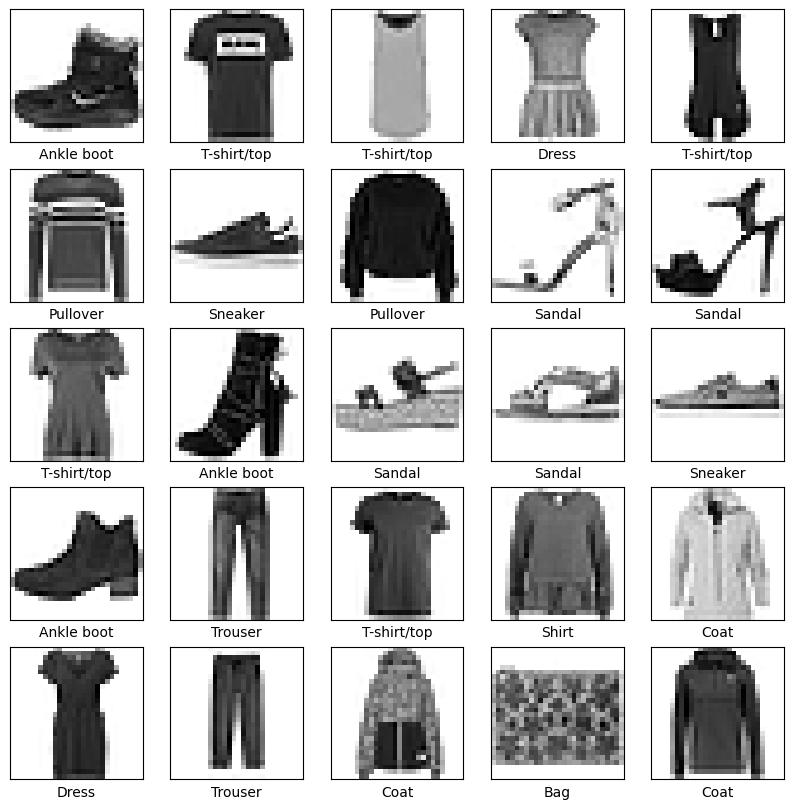

In [2]:
######################################################## Visualización de Algunas Imágenes ###################################################

# Definir las etiquetas de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Mostrar algunas imágenes de entrenamiento con sus etiquetas
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

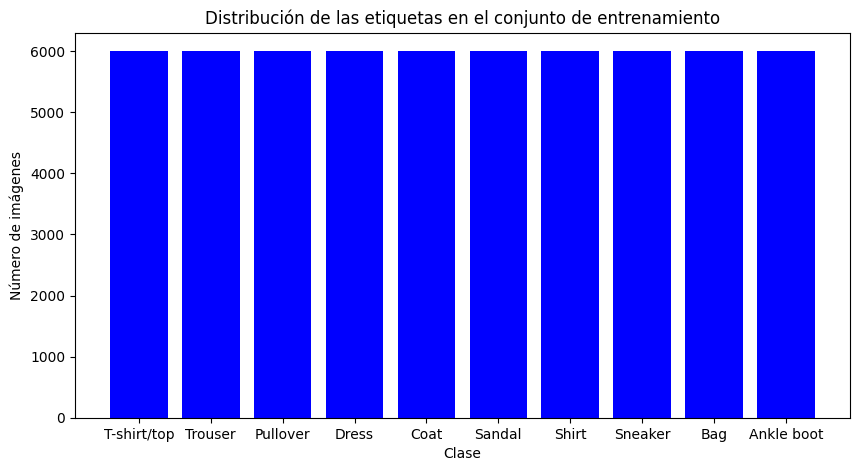

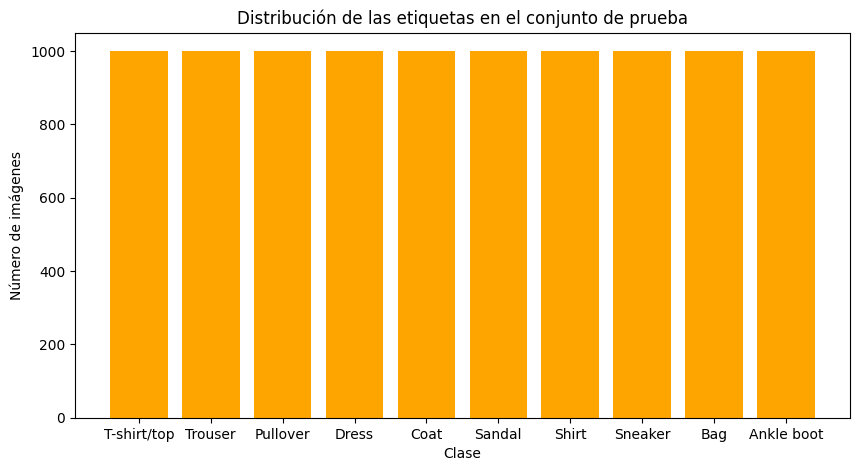

In [3]:
####################################################### Distribucion de etiquetas ###############################################################

# Contar la cantidad de imágenes en cada clase
train_label_counts = np.bincount(train_labels)
test_label_counts = np.bincount(test_labels)

# Mostrar la distribución de las etiquetas en el conjunto de entrenamiento
plt.figure(figsize=(10, 5))
plt.bar(class_names, train_label_counts, color='blue')
plt.title('Distribución de las etiquetas en el conjunto de entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.show()

# Mostrar la distribución de las etiquetas en el conjunto de prueba
plt.figure(figsize=(10, 5))
plt.bar(class_names, test_label_counts, color='orange')
plt.title('Distribución de las etiquetas en el conjunto de prueba')
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.show()

In [4]:
# Mostrar estadísticas básicas de las imágenes
print('Estadísticas del conjunto de entrenamiento:')
print(f'Mínimo valor de píxel: {train_images.min()}')
print(f'Máximo valor de píxel: {train_images.max()}')
print(f'Promedio de valores de píxel: {train_images.mean()}')
print(f'Desviación estándar de los valores de píxel: {train_images.std()}')

print('\nEstadísticas del conjunto de prueba:')
print(f'Mínimo valor de píxel: {test_images.min()}')
print(f'Máximo valor de píxel: {test_images.max()}')
print(f'Promedio de valores de píxel: {test_images.mean()}')
print(f'Desviación estándar de los valores de píxel: {test_images.std()}')

Estadísticas del conjunto de entrenamiento:
Mínimo valor de píxel: 0.0
Máximo valor de píxel: 1.0
Promedio de valores de píxel: 0.2860405969887955
Desviación estándar de los valores de píxel: 0.35302424451492237

Estadísticas del conjunto de prueba:
Mínimo valor de píxel: 0.0
Máximo valor de píxel: 1.0
Promedio de valores de píxel: 0.2868492807122849
Desviación estándar de los valores de píxel: 0.35244415324744005


### 2. Selección de modelo y entrenamiento.

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo con un learning rate ajustado
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumir el modelo
model.summary()

c:\Users\Melis\OneDrive\Documentos\Technical test\Technical test quipux\quipux\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Entrenar el modelo con más épocas y tamaño de batch ajustado
history = model.fit(train_images, train_labels_categorical, epochs=20, batch_size=64, validation_split=0.2)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6758 - loss: 0.8914 - val_accuracy: 0.8611 - val_loss: 0.3960
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8427 - loss: 0.4411 - val_accuracy: 0.8642 - val_loss: 0.3667
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8644 - loss: 0.3787 - val_accuracy: 0.8896 - val_loss: 0.3076
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8779 - loss: 0.3370 - val_accuracy: 0.8882 - val_loss: 0.3036
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8878 - loss: 0.3096 - val_accuracy: 0.8982 - val_loss: 0.2793
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8961 - loss: 0.2871 - val_accuracy: 0.9025 - val_loss: 0.2640
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9009 - loss: 0.2729 - val_accuracy: 0.9003 - val_loss: 0.2727
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9054 - loss: 0.2579 - val_accuracy: 0

### 3. Evaluación del modelo.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


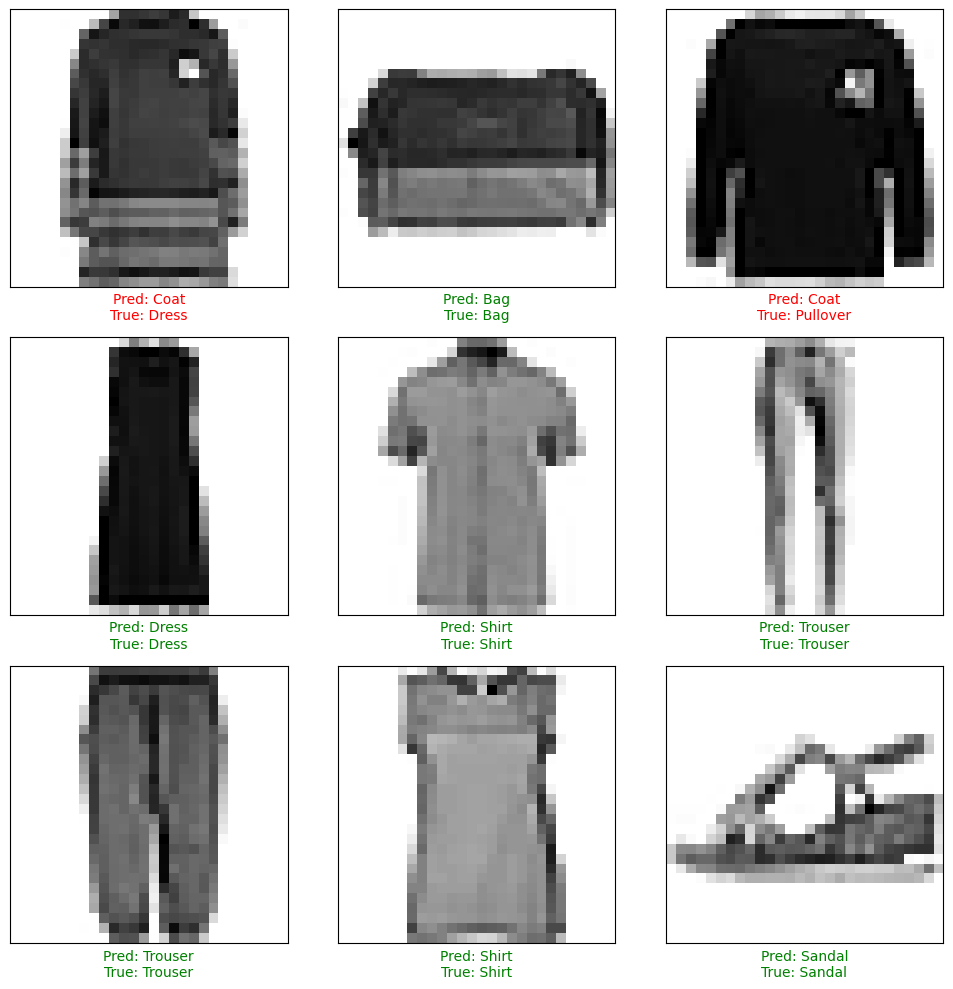

In [13]:
# Realizar predicciones sobre el conjunto de prueba
predictions = model.predict(test_images)

# Obtener las etiquetas predichas (índice de la clase con mayor probabilidad)
predicted_labels = np.argmax(predictions, axis=1)

# Elegir aleatoriamente 9 índices únicos del conjunto de prueba
random_indices = random.sample(range(len(test_images)), 9)

# Visualizar 3x3 imágenes con la etiqueta predicha y la real
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx].reshape(28, 28), cmap=plt.cm.binary)
    
    # Etiqueta predicha
    prediction = model.predict(np.expand_dims(test_images[idx], axis=0))
    predicted_label = np.argmax(prediction)
    predicted_class = class_names[predicted_label]

    # Etiqueta real
    true_label = test_labels[idx]
    true_class = class_names[true_label]

    # Mostrar la etiqueta predicha y la real
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f'Pred: {predicted_class}\nTrue: {true_class}', color=color)

plt.tight_layout()
plt.show()

In [8]:
model.save('fashion_mnist_model.keras')